In [1]:
# Set up the environment, import all packages you need in this worksheet.
import numpy as np
import math
from scipy import signal, misc
import scipy.io
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import audio2numpy as a2n
import sounddevice as sd

In [2]:
def ExploreFTplots(hn, zeropad, FS):
    '''
    Inputs:
    hn: 1D input signal
    zeropad: number of zero padding to the right side of hn
    FS: sampling frequency in Hz
    
    fvec - > 1D Vector specify the frequency domain
    FTOutput - > Fourier Transform result with DC centered in the middle of the array
    
    '''
    zeropaddedhn = np.concatenate((hn, np.zeros(zeropad)))
    fvec = np.linspace(-FS/2, FS/2, len(zeropaddedhn))
    fft_result = np.fft.fft(zeropaddedhn)
    FTOutput = np.fft.fftshift(fft_result)
    return fvec, FTOutput


In [45]:
x,fs = a2n.audio_from_file("BL its never too early.wav.mp3")

dt = 1/fs
t = np.linspace(0, len(x)*dt, len(x))
sd.play(x, fs)

[(-800.0, 800.0)]

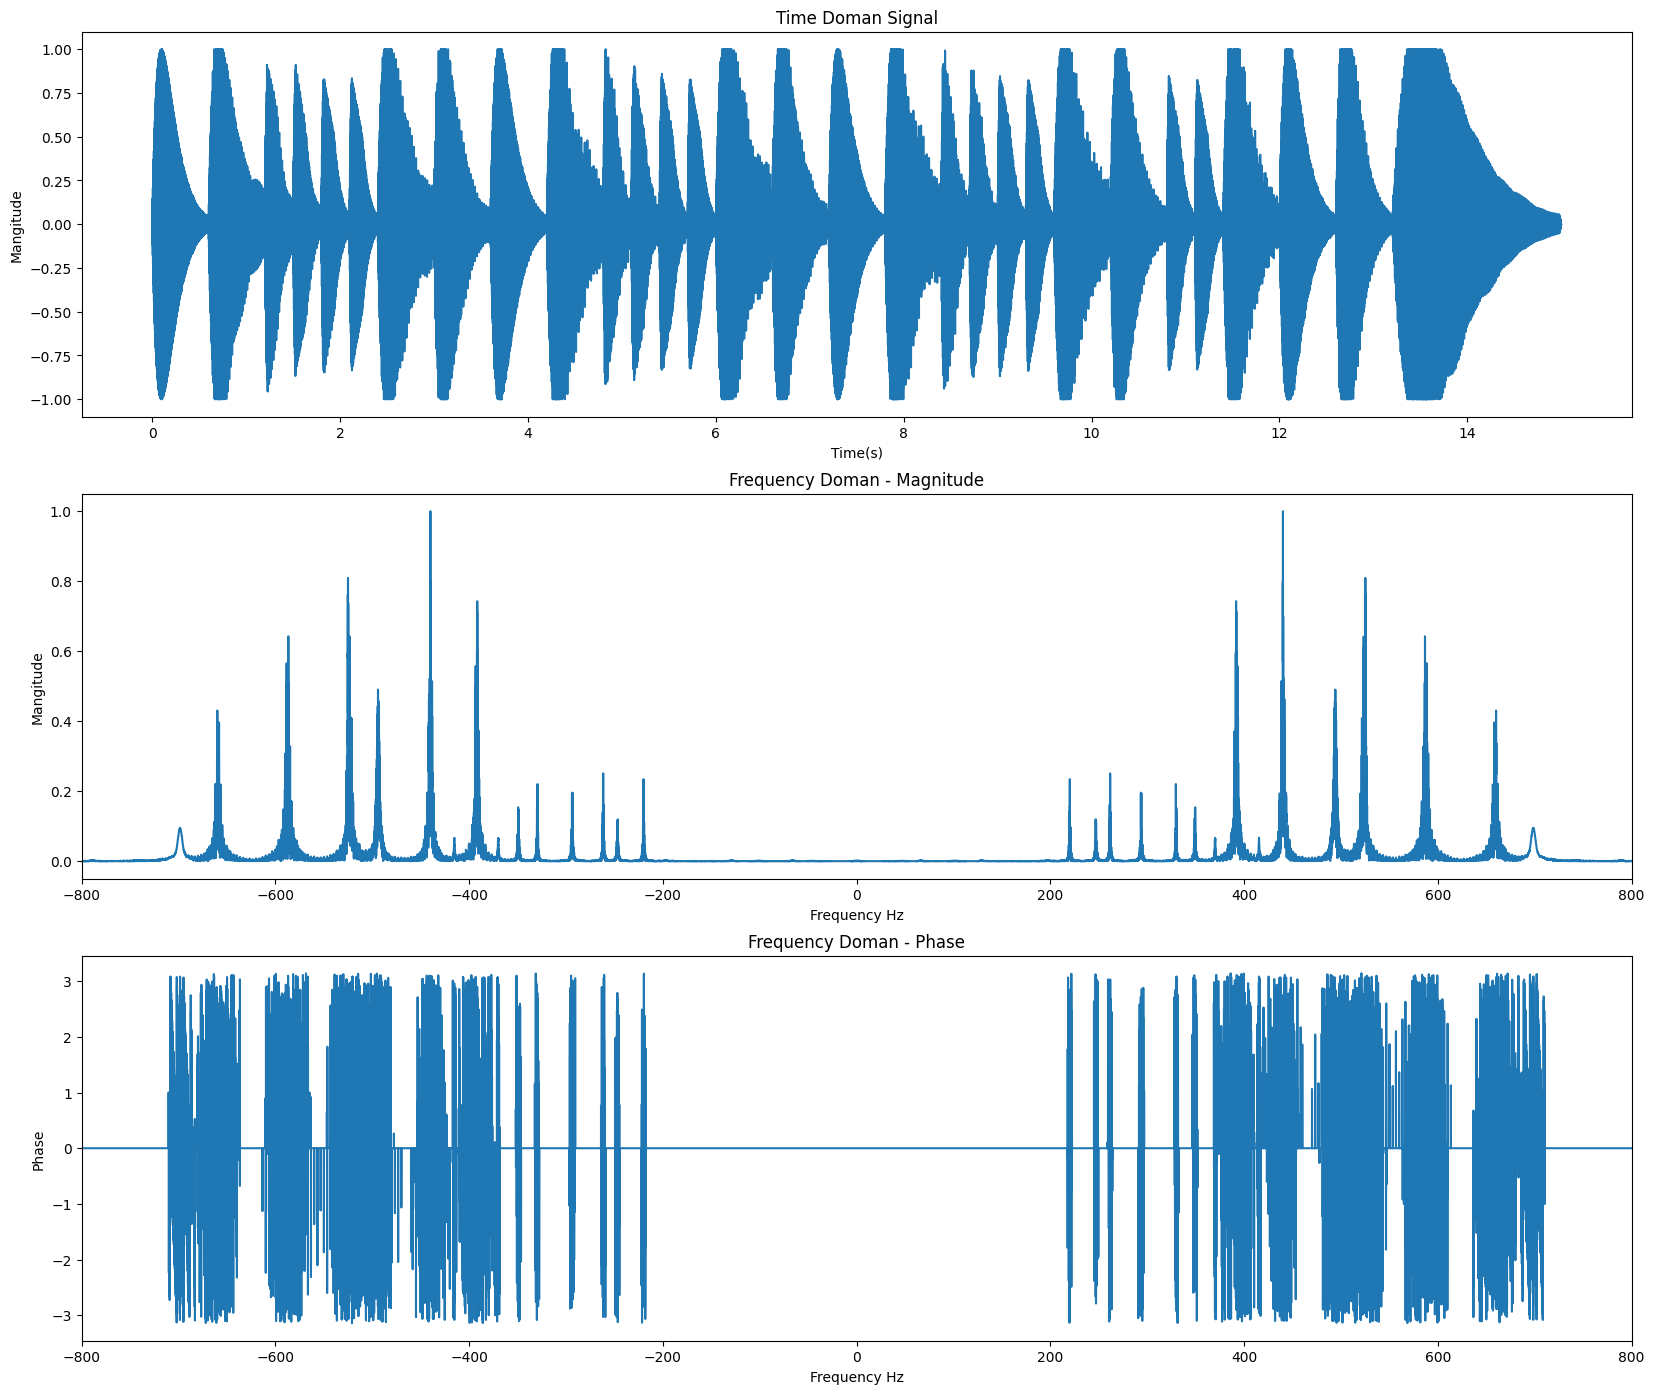

In [4]:
# frequency domain analysis (repeat but for your classmate's music instead of yours)
zeropad = 100000
FS = fs
fvec, FTOutput = ExploreFTplots(x, zeropad, FS)
# plot time domain signal
fig, axs = plt.subplots(3,1, figsize = (20, 17))
axs[0].plot(t, x)
axs[0].set_title('Time Doman Signal')
axs[0].set(xlabel='Time(s)', ylabel='Mangitude')

# plot normalized magnitude
max = np.abs(FTOutput).max()
axs[1].plot(fvec, np.abs(FTOutput)/max); #Magnitude
axs[1].set_title('Frequency Doman - Magnitude')
axs[1].set(xlabel='Frequency Hz', ylabel='Mangitude')
axs[1].set(xlim=[-800,800])

# plot phase with threshold
phase = np.angle(FTOutput) * (np.abs(FTOutput)/max > 0.01)
axs[2].plot(fvec, phase);#Phase
axs[2].set_title('Frequency Doman - Phase')
axs[2].set(xlabel='Frequency Hz', ylabel='Phase')
axs[2].set(xlim=[-800,800])

In [20]:
f, t, Zxx = signal.stft(x, fs)

Zxx.shape: (11026, 61)
Zxx.shape: (5513, 121)
Zxx.shape: (2757, 242)
Zxx.shape: (1379, 482)


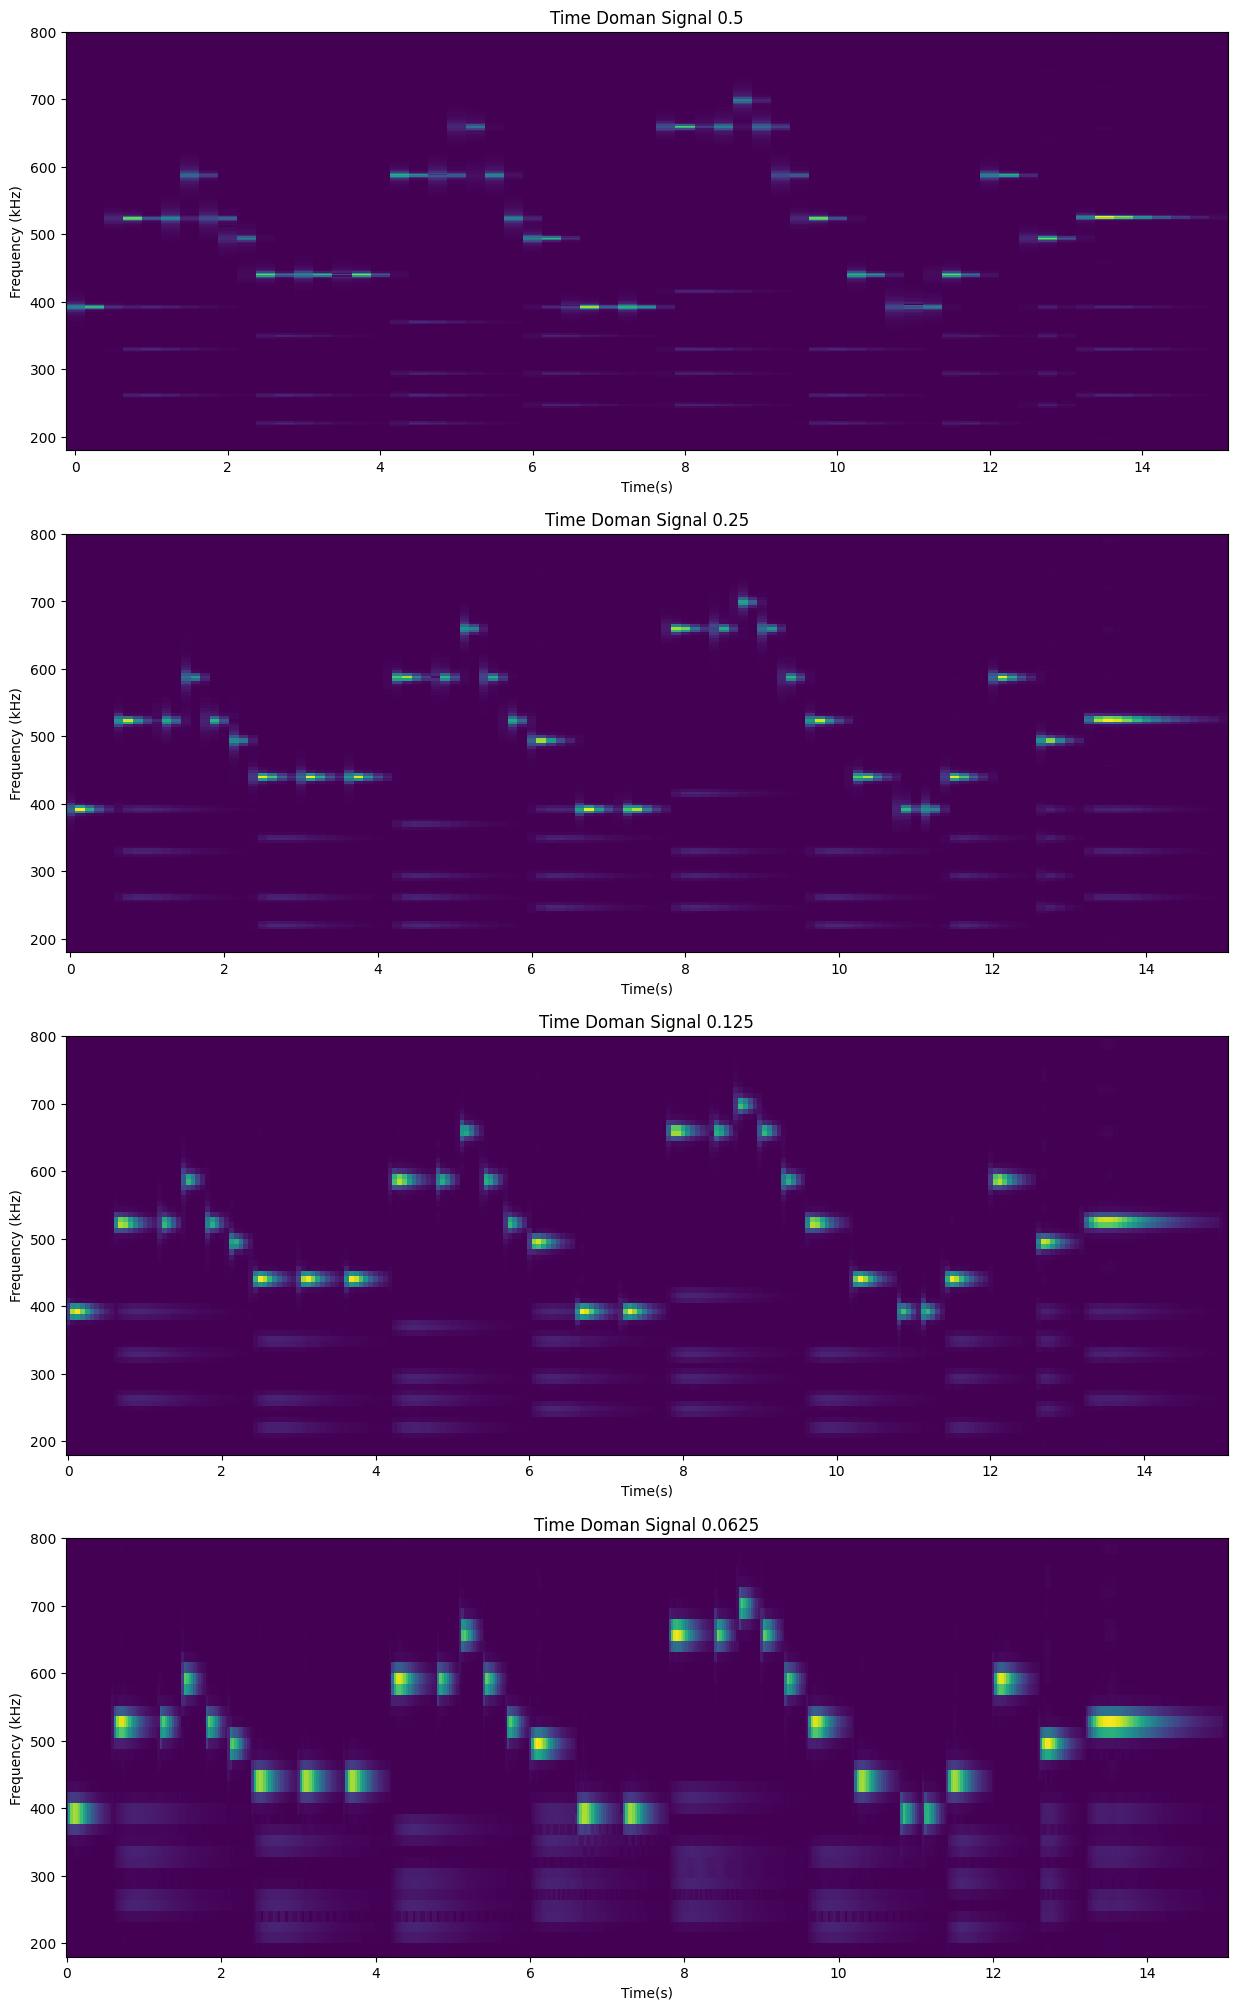

In [21]:

#sd.play(x, fs)
fig, axs = plt.subplots(4,1, figsize = (15, 25))
for idx, duration in enumerate([0.5, 0.25, 0.125, 0.0625]):
    
    nperseg = fs * duration
    f, t, Zxx = signal.stft(x, fs, nperseg=nperseg, nfft=nperseg)
    print('Zxx.shape:', Zxx.shape)


    axs[idx].pcolormesh(t, f, np.abs(Zxx))
    axs[idx].set_title('Time Doman Signal {}'.format(duration))
    axs[idx].set(xlabel='Time(s)', ylabel='Frequency (kHz)')
    axs[idx].set(ylim=[180,800])

In [9]:
## all of the notes and their frequencies GAH
gs3 = 207.65
a3 = 220
as3 = 233.08
b3 = 246.94
c4 = 261.63
cs4 = 277.18
d4 = 293.66
ds4 = 311.13
e4 = 329.63
f4 = 349.23
fs4 = 369.99
g4 = 392
gs4 = 415.3
a4 = 440
as4 = 466.16
b4 = 493.88
c5 = 523.25
cs5 = 554.37
d5 = 587.33
ds5 = 622.25
e5 = 659.25
f5 = 698.46
fs5 = 739.99
g5 = 783.99
gs5 = 830.61

In [49]:
f.dtype
nperseg = fs * 1
f, t, Zxx = signal.stft(x, fs, nperseg=nperseg, nfft=nperseg)
print(f)
print(f.size)
time = np.linspace(0, t[-1], len(f))
print(time.size)


[0.0000e+00 1.0000e+00 2.0000e+00 ... 2.2048e+04 2.2049e+04 2.2050e+04]
22051
22051


In [50]:
## map frequencies to pitches
def freqtopitch(freqs, time):
    notes, timings = [], []
    for i in range(len(freqs)):
        if (freqs[i] < gs3 + 10) & (freqs[i] > gs3 - 10):
            notes.append('g#3')
        elif (freqs[i] < a3 + 10) & (freqs[i] > a3 - 10):
            notes.append('a3')
        elif (freqs[i] < as3 + 10) & (freqs[i] > as3 - 10):
            notes.append('a#3')
        elif (freqs[i] < b3 + 10) & (freqs[i] > b3 - 10):
            notes.append('b3')
        elif (freqs[i] < c4 + 10) & (freqs[i] > c4 - 10):
            notes.append('c4')
        elif (freqs[i] < cs4 + 10) & (freqs[i] > cs4 - 10):
            notes.append('c#4')
        elif (freqs[i] < d4 + 10) & (freqs[i] > d4 - 10):
            notes.append('d4')
        elif (freqs[i] < ds4 + 10) & (freqs[i] > ds4 - 10):
            notes.append('d#4')
        elif (freqs[i] < e4 + 10) & (freqs[i] > e4 - 10):
            notes.append('e4')
        elif (freqs[i] < f4 + 10) & (freqs[i] > f4 - 10):
            notes.append('f4')
        elif (freqs[i] < fs4 + 10) & (freqs[i] > fs4 - 10):
            notes.append('f#4')
        elif (freqs[i] < g4 + 10) & (freqs[i] > g4 - 10):
            notes.append('g4')
        elif (freqs[i] < gs4 + 10) & (freqs[i] > gs4 - 10):
            notes.append('g#4')
        elif (freqs[i] < a4 + 10) & (freqs[i] > a4 - 10):
            notes.append('a4')
        elif (freqs[i] < as4 + 10) & (freqs[i] > as4 - 10):
            notes.append('a#4')
        elif (freqs[i] < b4 + 10) & (freqs[i] > b4 - 10):
            notes.append('b4')
        elif (freqs[i] < c5 + 10) & (freqs[i] > c5 - 10):
            notes.append('c5')
        elif (freqs[i] < cs5 + 10) & (freqs[i] > cs5 - 10):
            notes.append('c#5')
        elif (freqs[i] < d5 + 10) & (freqs[i] > d5 - 10):
            notes.append('d5')
        elif (freqs[i] < ds5 + 10) & (freqs[i] > ds5 - 10):
            notes.append('d#5')
        elif (freqs[i] < e5 + 10) & (freqs[i] > e5 - 10):
            notes.append('e5')
        elif (freqs[i] < f5 + 10) & (freqs[i] > f5 - 10):
            notes.append('f5')
        elif (freqs[i] < fs5 + 10) & (freqs[i] > fs5 - 10):
            notes.append('f#5')
        elif (freqs[i] < g5 + 10) & (freqs[i] > g5 - 10):
            notes.append('g5')
        elif (freqs[i] < gs5 + 10) & (freqs[i] > gs5 - 10):
            notes.append('g#5')
    timings.append(0)
    for i in range(len(notes)):
        for j in range(1,len(notes)):
            if notes[i] != notes[j]:
                timings.append(time[j])
    return notes, timings


In [57]:
song, timing = freqtopitch(f, time)
print(song[:5])
print(timing[:5])
# print(f.size)

['g#3', 'g#3', 'g#3', 'g#3', 'g#3']
[0, 0.013605442176870748, 0.014285714285714285, 0.014965986394557823, 0.01564625850340136]
